# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [2]:
from platform import python_version
print(python_version())

PYTHON_VERSION = '3.7.3'

3.7.3


In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [4]:
data.tail()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K
45221,35,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [5]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == '>50K']

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'] == '<=50K']

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100*len(n_greater_50k)/n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000:        age          workclass education_level  education-num  \
7       52   Self-emp-not-inc         HS-grad            9.0   
8       31            Private         Masters           14.0   
9       42            Private       Bachelors           13.0   
10      37            Private    Some-college           10.0   
11      30          State-gov       Bachelors           13.0   
18      43   Self-emp-not-inc         Masters           14.0   
19      40            Private       Doctorate           16.0   
24      56          Local-gov       Bachelors           13.0   
42      57        Federal-gov       Bachelors           13.0   
48      47            Private     Prof-school           15.0   
49      50        Federal-gov       Bachelors           13.0   
51      43            Private    Some-college           10.0   
58      42            Private       Doctorate           16.0   
62      53            Private      

** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

C:\Users\wc5257\Documents\Programming Training\Udacity - Introduction to Machine Learning\Supervised Learning\Finding Donors for CharityML\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


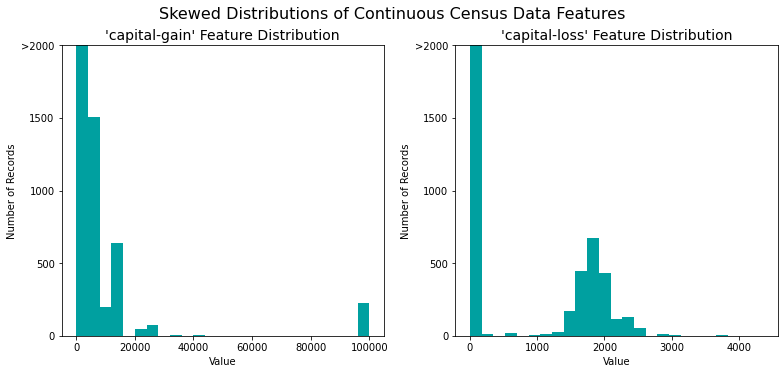

In [6]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

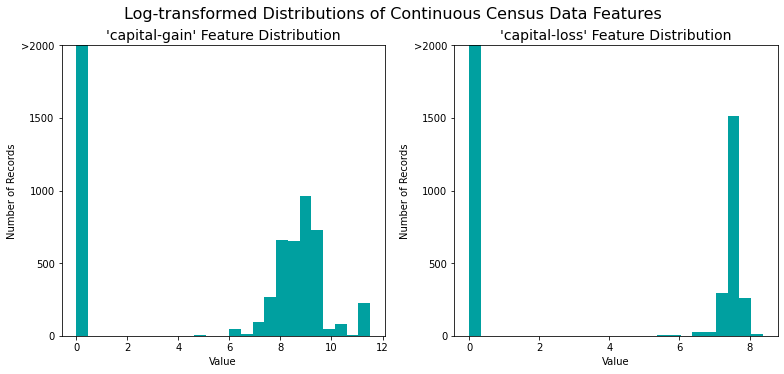

In [7]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [9]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = np.where((income_raw) == '>50K',1,0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)
print(income)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [436]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
                    #   encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
accuracy  = np.sum(income)/len(income)
recall    = 1
precision = accuracy

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = .5
fscore = (1+beta**2)*(precision*recall) / (((beta**2)*precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

>*Decision Tree*
>>https://en.wikipedia.org/wiki/Decision_tree_learning#Uses
>>- Many data mining software packages provide implementations of one or more decision tree algorithms. 
>>- Easy to interpret visually
>>- Prone to overfitting
>>- Decision trees are good for classification.  

>*Gradient Boosting Classifier (Gradient Boosting)*
>>https://en.wikipedia.org/wiki/Gradient_boosting
>>- The commercial web search engines Yahoo and Yandex use variants of gradient boosting in their machine-learned ranking engines 
>>- Many consider it an improvement to AdaBoost. 
>>- It can lead to overfitting. Use early stopping to avoid this. 
>>- Gradient Boosted Classifier should be even better for classification. 

>*Logistic Regression*
>>https://en.wikipedia.org/wiki/Logistic_regression
>>- Logic Regression is used in the baking industry to determine if a loan will default.
>>- Provides probabilities for outcomes. Low variance 
>>- High bias 
>>- The y value (income) is binary (0 or 1)

>*Note:* Naive Bayes is not used because the features are not normally distributed. 

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [40]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

# NOTE: X_train and X_test are dataframes while y_train and y_test are ndarrays

from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    f_beta  = .5
    
    # TODO: Fit the learner to the training data using slicing with 
    #        'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train.iloc[:sample_size,:], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test  = learner.predict(X_test)
    predictions_train = learner.predict(X_train.iloc[:300,:])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(predictions_train, y_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(predictions_test, y_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(predictions_train, y_train[:300], beta=f_beta)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(predictions_test, y_test, beta=f_beta)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [41]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier()
clf_B = GradientBoostingClassifier()
clf_C = LogisticRegression()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10  = int(.1*samples_100)
samples_1   = int(.01*samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)

DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.


C:\Users\wc5257\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wc5257\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wc5257\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression trained on 36177 samples.


C:\Users\wc5257\Documents\Programming Training\Udacity - Introduction to Machine Learning\Supervised Learning\Finding Donors for CharityML\visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


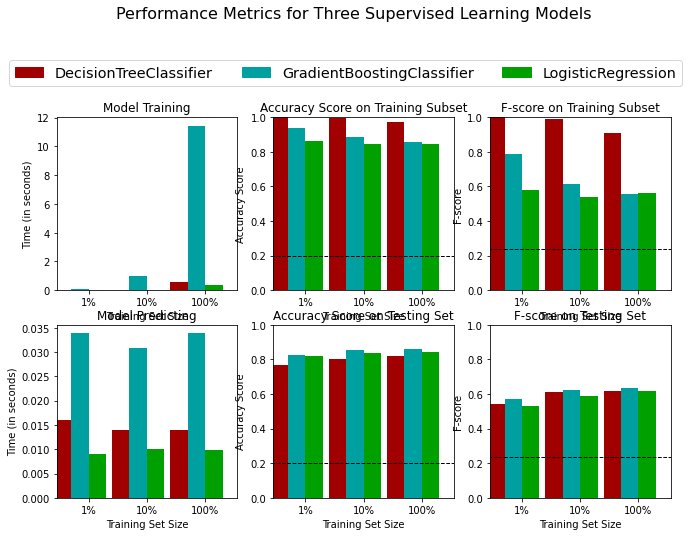

In [42]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **
>I am choosing the Gradient Boosting Classifier because it provided the highest F1 score when using the testing set. This was true for 1%, 10% and 100% of the Training Sets.<br><br>
>The F1 score with 100% of the training data is around 0.65 for the default model. For comparison, the F1 scores for the default Decision Tree Classifier and Logistic Regressor are slightly lower at around 0.64. Naive predictor performance is around 0.25.<br><br>
>The Gradient Boosting Classifier takes much longer to train than the others (approximately 10 times as much). The training time was 10 seconds. 

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

>Gradient Boosting is a method where a series of simple, poor performing models (week learners) are created and optimized based on the performance of the previous model. It can be thought of as continuous improvement process where an initial simple model is created and its errors used to optimize the next in line model. When the process ends, the resulting model is a combination of all the previous models.<br>    

>The key to Gradient Boosting is the evaluation of a loss function for each of the sequential models. After each model is created, a loss function is evaluated and information from this loss function (i.e., the error of the prediction) is used in the creation of the next sequential model.<br>

>In short, Gradient Boosting can be thougt of as creating a 'strong learner' from a series of 'weak learners.'<br>

>https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab<br>
>https://www.displayr.com/gradient-boosting-the-coolest-kid-on-the-machine-learning-block/

  

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [43]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=2)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

# NOTE: I ran this many times and updated the parameter list each time based on the output. 
#       I did this to keep the number of variables per run low.
#       The parameters that are commented out are the ranges that I optimized through. 
#       The remaining parameters are the best ones. 
parameters = {'n_estimators': [250],    #[100, 150, 200, 250, 300, 350, 400]
              'max_depth': [5],         #[3,4,5,6,7]
              'min_samples_split': [4], #[2,3,4,5,6]
              'min_samples_leaf': [6],  #[2,3,4,5,6]
              'learning_rate': [.1],    #[.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
              'subsample': [.8]         #[.8,.9,1]
             }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
start = time()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
end = time()

duration = end-start

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("Duration: ",duration)

print(best_clf)

C:\Users\wc5257\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8723
Final F-score on the testing data: 0.7523
Duration:  176.83426451683044
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='auto',
                           random_state=2, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8630       |     0.8723      |
| F-score        |      0.7395       |     0.7523      |


**Answer: **

> The optimized model is better than the unoptimized model, but not by much. In fact, I would say that given the time spent optimizing the model was not worth it because the improvement was less than 2%.<br><br>
> It seems that the biggest improvement is the use of cross-validation for training rather than seperate test and train sets. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

>I really don't know which 5 would be best. Below is a list of what I think might be important.
>>1. education-num - because education is very important and this faeature is a numerical representation of it<br>
>>2. occupation - some occuparions pay more than others<br>
>>3. sex - men (sometimes) make more than women<br>
>>4. age - middle ageg people make more than the young or old<br>
>>5. work class - this is related to occupation<br>



### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

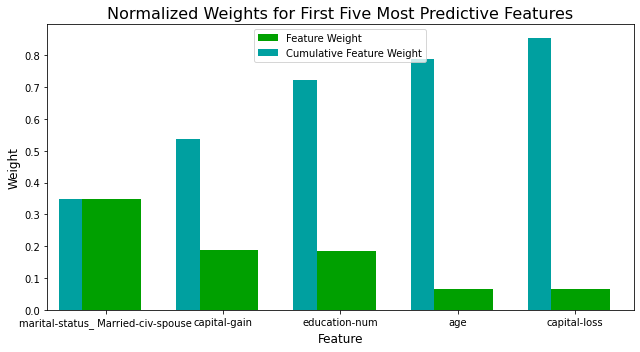

In [53]:
# In this section, I am looking at the feature importances for the optimized Gradient Boosting Classifier from above. 


# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
#model = None

# I am choosing to use the *optimized* Gradient Boosting Classifier from above. 

# TODO: Extract the feature importances using .feature_importances_ 
importances_best_clf = best_clf.feature_importances_

# Plot
vs.feature_plot(importances_best_clf, X_train, y_train)

In [55]:
print(X_train.columns.values[np.argsort(importances_best_clf)[::-1]][:5])

['marital-status_ Married-civ-spouse' 'capital-gain' 'education-num' 'age'
 'capital-loss']


### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

>Some of my predictions were right such as age and education and others, such as being married to a civilian, were a suprise. I am not sure what capital gain and loss mean in the context of this data set.<br><br>
>I will intepret the results as follows:<br>
>>The most likely indicator of someone making more than 50K is if they are married to a civilian.<br>
>>The second most likely indicator is the amount of capital gain. The higher it is, the more likely to make more than 50K.<br>
>>The third most likely indicator is the education level, in numerical form. The higher the education level, the more likely to make more than 50K.<br>
>>The forth most likely indicator is age. There is probably an age range where one is likely to make more than 50K.<br>
>>The fifth most likely indicator is capital loss.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [57]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances_best_clf)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances_best_clf)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8723
F-score on testing data: 0.7523

Final Model trained on reduced data
------
Accuracy on testing data: 0.8569
F-score on testing data: 0.7206


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

>The use of the top 5 features drastically decreased the runtime of the training phase but it also reduced the accuracy and F-score.<br> 
>Obviously, if training time is important and a lower accuracy and F-score is tolerable, then reducing the feature set to the most important ones could be beneficial; however, to identify the most important features, one has to have already run a tuned model.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Kaggle submission

https://www.kaggle.com/c/udacity-mlcharity-competition

In [405]:
kaggle_test = pd.read_csv('test_census.csv')

# check for nans
kaggle_test.isnull().sum()
#age                17
#workclass          22
#education_level    20
#education-num      14
#marital-status     21
#occupation         22
#relationship       16
#race               19
#sex                19
#capital-gain       15
#capital-loss       17
#hours-per-week     13
#native-country     16


Unnamed: 0          0
age                17
workclass          22
education_level    20
education-num      14
marital-status     21
occupation         22
relationship       16
race               19
sex                19
capital-gain       15
capital-loss       17
hours-per-week     13
native-country     16
dtype: int64

In [406]:
# set NaN age to the mean value (38.5)
kaggle_test.age.fillna(kaggle_test.age.mean(), inplace=True)
print('number of age NaNs after cleaning: ',kaggle_test.age.isnull().sum())

number of age NaNs after cleaning:  0


In [407]:
# fix education level_level and education-num 
print(kaggle_test.education_level.value_counts())
print(kaggle_test['education-num'].value_counts())


edu_lev_num_map = {' HS-grad': 9.0, ' Some-college': 10.0, ' Bachelors': 13.0, ' Masters': 14.0, ' Assoc-voc': 11.0,
                   ' 11th': 7.0, ' Assoc-acdm': 12.0, ' 10th': 6.0, ' 7th-8th': 4.0, ' Prof-school': 15.0,
                   ' 9th': 5.0, ' 12th': 8.0, ' Doctorate': 16.0, ' 5th-6th': 3.0, ' 1st-4th': 2.0, ' Preschool': 1.0
                  }
edu_map_inv = {}
edu_map_inv = {v: k for k, v in edu_lev_num_map.items()}

# I didn't use this
mismatches   = {'HS_grad': -2, 'Some-college': 2, 'Bachelors': 1, 'Masters': -2, 'Assoc-voc': -2, 
                '11th': -1, 'Assoc-acdm': 0, '10th': 1, '7th-8th': 0, 'Prof-school': -1, 
                '9th': 0, '12th': -1, 'Doctorate': 0, '5th-6th': 0, '1st-4th': -1, 'Preschool': 0
               }

# are there any situation where both the education-level and education_num are nan? No
#kaggle_test.loc[(kaggle_test.education_level.isnull()) & (kaggle_test['education-num'].isnull())]

# we should be able to fill in the nans for one column with the data from the other
temp_df = kaggle_test.loc[(kaggle_test['education-num'].isnull())][['education_level','education-num']].copy()
temp_df['education-num'] = temp_df['education_level']
temp_df['education-num'] = temp_df['education-num'].apply(lambda x: edu_lev_num_map[x])
index = temp_df.index

temp_df2= kaggle_test.loc[(kaggle_test['education_level'].isnull())][['education_level','education-num']].copy()
temp_df2['education_level'] = temp_df2['education-num']
temp_df2['education_level'] = temp_df2['education_level'].apply(lambda x: edu_map_inv[x])
index2 = temp_df2.index

kaggle_test.at[index, 'education-num'] = temp_df['education-num']
kaggle_test.at[index2, 'education_level'] = temp_df2['education_level']

print('numbers of education-num and education_level NaNs after cleaning: ',\
      kaggle_test.loc[(kaggle_test['education-num'].isnull())], \
      kaggle_test.loc[(kaggle_test['education_level'].isnull())])

 HS-grad         14776
 Some-college     9898
 Bachelors        7569
 Masters          2510
 Assoc-voc        1957
 11th             1618
 Assoc-acdm       1507
 10th             1223
 7th-8th           822
 Prof-school       784
 9th               676
 12th              576
 Doctorate         544
 5th-6th           449
 1st-4th           221
 Preschool          72
Name: education_level, dtype: int64
9.0     14778
10.0     9896
13.0     7568
14.0     2512
11.0     1959
7.0      1619
12.0     1507
6.0      1222
4.0       822
15.0      785
5.0       676
8.0       577
16.0      544
3.0       449
2.0       222
1.0        72
Name: education-num, dtype: int64
numbers of education-num and education_level NaNs after cleaning:  Empty DataFrame
Columns: [Unnamed: 0, age, workclass, education_level, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country]
Index: [] Empty DataFrame
Columns: [Unnamed: 0, age, workclass, educatio

In [408]:
# fix workclass. Since the vast majority are 'private,' we will set the nans to private
kaggle_test.workclass.fillna(' Private', inplace=True)
print('number of workclass NaNs after cleaning: ',kaggle_test.workclass.isnull().sum())

number of workclass NaNs after cleaning:  0


In [409]:
# fix marital status. Since the majority are 'Married-civ-spouse,' we will set the nans to private
kaggle_test['marital-status'].fillna(' Married-civ-spouse', inplace=True)
print('number of marital status NaNs after cleaning: ',kaggle_test['marital-status'].isnull().sum())

number of marital status NaNs after cleaning:  0


In [410]:
# Fix sex. There are 30512 males and 14691 females. We'll set to male
kaggle_test.sex.describe()
kaggle_test.sex.fillna(' Male', inplace=True)
print('the number of sex NaNs after cleaning is: ',kaggle_test.sex.isnull().sum())

the number of sex NaNs after cleaning is:  0


In [411]:
# fix relationship, race, native country
# white is by far the most frequent race and United States the most frequent country

print(kaggle_test.race.describe())
print(kaggle_test['native-country'].describe())

kaggle_test.race.fillna(' White', inplace=True)
kaggle_test['native-country'].fillna(' United-States', inplace=True)

print('numbers of race and native country NaNs after cleaning: ',\
      kaggle_test.race.isnull().sum(), kaggle_test['native-country'].isnull().sum())

count      45203
unique         5
top        White
freq       38884
Name: race, dtype: object
count              45206
unique                41
top        United-States
freq               41278
Name: native-country, dtype: object
numbers of race and native country NaNs after cleaning:  0 0


In [412]:
# fix relationship

# since married is the most frequent marital status and since husband is the most frequent relatinship,
#   we will assign husband to men and wife to women who are married and unmarried to the rest
print(kaggle_test.relationship.describe())
print(kaggle_test.loc[kaggle_test.relationship.isnull()])

# I think I will just iterate through the data where relationship is nan
for index, row in kaggle_test.loc[kaggle_test.relationship.isnull()].iterrows():
    if row['marital-status'] == ' Married-civ-spouse':
            if row.sex == ' Female':
                kaggle_test.at[index, 'relationship'] = ' Wife'
            else:
                kaggle_test.at[index, 'relationship'] = ' Husband'
    else:
        kaggle_test.at[index, 'relationship'] = ' Unmarried'
        
print('number of relationship NaNs after cleaning: ', kaggle_test.relationship.isnull().sum())

count        45206
unique           6
top        Husband
freq         18660
Name: relationship, dtype: object
       Unnamed: 0   age          workclass education_level  education-num  \
590           590  38.0          Local-gov         HS-grad            9.0   
7543         7543  38.0            Private       Assoc-voc           11.0   
7743         7743  41.0            Private         HS-grad            9.0   
7881         7881  27.0       Self-emp-inc         HS-grad            9.0   
16506       16506  28.0            Private       Bachelors           13.0   
18306       18306  43.0            Private    Some-college           10.0   
18801       18801  23.0            Private       Bachelors           13.0   
23207       23207  39.0            Private    Some-college           10.0   
25564       25564  58.0          Local-gov       Bachelors           13.0   
37132       37132  41.0   Self-emp-not-inc         Masters           14.0   
37964       37964  33.0            Private 

In [413]:
# fix capital gains and losses
# I think we will just set these to the mean
kaggle_test['capital-gain'].fillna(kaggle_test['capital-gain'].mean(), inplace=True)
kaggle_test['capital-loss'].fillna(kaggle_test['capital-loss'].mean(), inplace=True)

print('numbers of capital gain and loss NaNs after cleaning: ',\
      kaggle_test['capital-gain'].isnull().sum(), kaggle_test['capital-loss'].isnull().sum())

numbers of capital gain and loss NaNs after cleaning:  0 0


In [414]:
# fix occupation

#print(kaggle_test.occupation.value_counts())
# occupation seems to be evenly distirbuted between 'Craft-repair', 'Prof-speciality, 'Exec-managerial,'
#   'Adm-clerical, and 'sales

# lets see if there are any patterns
cols_to_test = ['occupation', 'education_level', 'sex']
gb = kaggle_test[cols_to_test].groupby(['occupation', 'education_level', 'sex']).size()
#print(gb.to_string())

# I see some patterns in data and I will map values based on it. I know this introduces bias but
# the number of entries I am mapping is small and I don't want to spend hours on it. 
#
# Logic:
#  Female and < HS education: 'Adm-clerical', else 'Prof-speciality'
#  Male   and < HS educationL 'Craft-repair', elif 'Doctorate': 'Exec-Managerial', else 'Prof-specality'

# I think I will just iterate through the data where occupation is nan
for index, row in kaggle_test.loc[kaggle_test.occupation.isnull()].iterrows():
    if row.education_level in ([' Bachelors', ' Masters', ' Doctorate']):
        kaggle_test.at[index, 'occupation'] = ' Prof-specialty'
    elif row.sex == ' Female':
        kaggle_test.at[index, 'occupation'] = ' Adm-clerical'
    elif row.sex == ' Male':
        kaggle_test.at[index, 'occupation'] = ' Craft-repair'

print('number of occupation NaNs after cleaning: ',kaggle_test.occupation.isnull().sum())

number of occupation NaNs after cleaning:  0


In [415]:
# fix hours per week. Let's replace with mean
kaggle_test['hours-per-week'].fillna(kaggle_test['hours-per-week'].mean(), inplace=True)

print('number of hours-per-week NaNs after cleaning: ',\
      kaggle_test['hours-per-week'].isnull().sum())

number of hours-per-week NaNs after cleaning:  0


In [416]:
# at this point, NaNs should be addressed. Let's check
kaggle_test.isnull().sum()

Unnamed: 0         0
age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [425]:
kaggle_test.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
kaggle_features = kaggle_test.drop('id', 1)
print(kaggle_test.head())
print(kaggle_features.head())

   id   age          workclass education_level  education-num  \
0   0  21.0            Private            10th            6.0   
1   1  49.0            Private       Bachelors           13.0   
2   2  44.0   Self-emp-not-inc      Assoc-acdm           12.0   
3   3  34.0            Private       Bachelors           13.0   
4   4  24.0            Private         HS-grad            9.0   

        marital-status          occupation relationship    race      sex  \
0   Married-civ-spouse        Craft-repair      Husband   White     Male   
1   Married-civ-spouse        Adm-clerical         Wife   White   Female   
2   Married-civ-spouse       Other-service         Wife   White   Female   
3   Married-civ-spouse               Sales      Husband   White     Male   
4   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   

   capital-gain  capital-loss  hours-per-week  native-country  
0           0.0           0.0            40.0   United-States  
1           0.0         

In [426]:
# Log-transform the skewed features
features_log_transformed_kaggle         = pd.DataFrame(data = kaggle_features)
features_log_transformed_kaggle[skewed] = kaggle_test[skewed].apply(lambda x: np.log(x + 1))

# Scale the features
scaler_kaggle                                   = MinMaxScaler()
features_log_minmax_transform_kaggle            = pd.DataFrame(data = features_log_transformed_kaggle)
features_log_minmax_transform_kaggle[numerical] = scaler_kaggle.fit_transform(features_log_transformed_kaggle[numerical])

# One-hot encode the 'features_log_minmax_transform_kaggle' data using pandas.get_dummies()
features_final_kaggle = pd.get_dummies(features_log_minmax_transform_kaggle)

In [428]:
# predict using optimized Gradient Boosting Classifier
kaggle_test['income'] = best_clf.predict_proba(features_final_kaggle)[:,1]

In [429]:
# generate output file
kaggle_test[['id', 'income']].to_csv("submission.csv", index=False)

In [430]:
kaggle_test

,id,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,0.023432
1,1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States,0.778932
2,2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States,0.173261
3,3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States,0.995089
4,4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,0.054139
5,5,52.0,Private,7th-8th,4.0,Divorced,Priv-house-serv,Own-child,Black,Female,0.0,0.0,16.0,United-States,0.004350
6,6,61.0,Private,7th-8th,4.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,50.0,United-States,0.195712
7,7,24.0,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,0.070237
8,8,30.0,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,22.0,United-States,0.005785
9,9,42.0,Local-gov,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,0.540258


### Results from Kaggle Competion

Score: 0.94258 which at the time was good enough for 18th place. 

## Thoughts
>Feature Engineering
>>- I believe the data could have benefitted from more feture engineering. For example, some of the features are reduncant and could be removed (e.g., education_level and education-num)<br><br>
>>- The dataset for the exercise did not have any NaNs in it, but the Kaggle test set did.<br> 
>>> I noticed from looking at Kaggle notebooks that many partipants simply used either means, medians, or ffill to fill in the NaNs.<br><br>
>>> I noticed that some of the NaNs could be derived from other columns directly (e.g., education_level and education-num) or approximated from them (e.g., occupation). I took the approach of algorithmically determining some of the values and for the ones I could not I picked the mean or median. I wonder how much this helped.<br>  

>Model Tuning
>>- For this exercise, we used fbeta with beta=.5 as the scoring mechanism. In the Kaggle competition, they used ROC. I used the model I created for this exercise for the Kaggle competition. I wonder if I were to retune the model using ROC would I get a higher score.<br>
>>- I spend hours tuning the model and only got a small improvement (<2%) from the default. I felt that using cross validation over train/test provided much more benefit than did model tuning. <br>

>Overall
>>- I learned a lot from this and am pleasentaly suprised at how well I did on the Kaggle competion.